In [1]:
import numpy as np
import pandas as pd
import bpl

In [2]:
import sys
sys.path.append('../src/')
from bpl_interface import *
from tournament import *

In [3]:
results = pd.read_csv('../data/results.csv', parse_dates=['date'])
results_since_2018_wc = pd.read_csv('../data/match_results_since_2018.csv', parse_dates=['date'])
wc_teams = pd.read_csv('../data/teams.csv')
fifa_rankings = pd.read_csv('../data/fifa_rankings.csv')
fixtures = pd.read_csv('../data/fixtures.csv')

Initialise the world cup predictor by passing in only results since the last world cup and fit the model only considering games between the teams in the world cup. We do this because:
* we don't fit parameters to teams that aren't in the world cup
* we can pass in fifa rankings

In [32]:
pd.concat([results_since_2018_wc[results_since_2018_wc["home_team"]=="Netherlands"],
           results_since_2018_wc[results_since_2018_wc["away_team"]=="Netherlands"]])

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
102,102,2018-09-06,Netherlands,Peru,2,1,Friendly,Amsterdam,Netherlands,False
273,273,2018-10-13,Netherlands,Germany,3,0,UEFA Nations League,Amsterdam,Netherlands,False
391,391,2018-11-16,Netherlands,France,2,0,UEFA Nations League,Rotterdam,Netherlands,False
614,614,2019-03-21,Netherlands,Belarus,4,0,UEFA Euro qualification,Rotterdam,Netherlands,False
668,668,2019-03-24,Netherlands,Germany,2,3,UEFA Euro qualification,Amsterdam,Netherlands,False
1317,1317,2019-10-10,Netherlands,Northern Ireland,3,1,UEFA Euro qualification,Rotterdam,Netherlands,False
1639,1639,2019-11-19,Netherlands,Estonia,5,0,UEFA Euro qualification,Amsterdam,Netherlands,False
1717,1717,2020-09-04,Netherlands,Poland,1,0,UEFA Nations League,Amsterdam,Netherlands,False
1744,1744,2020-09-07,Netherlands,Italy,0,1,UEFA Nations League,Amsterdam,Netherlands,False
1772,1772,2020-10-07,Netherlands,Mexico,0,1,Friendly,Amsterdam,Netherlands,False


In [33]:
wc_pred = WCPred(results = results_since_2018_wc)
# wc_pred = WCPred(results = results_since_2018_wc,
#                  teams = list(wc_teams.Team),
#                  ratings = fifa_rankings)

Note that we can fit the model by doing `wc_pred.set_training_data()` and `wc_pred.fit_model()`. These will put training data in `wc_pred.training_data` and the model in `wc_pred.model`.

Now, initialise the tournament:

In [34]:
tourn = Tournament()

Running these last two cells will keep on giving you different answers (the prediction of the games using the model will predict different scorelines and different outcomes from each of the group and knockout games).

It will make predictions based on the model fitted in `wc_pred`.

In [52]:
tourn.play_group_stage(wc_pred, verbose = False)

In [53]:
tourn.play_knockout_stages(wc_pred, verbose = False)

 Group C has played 54 matches
Sorting ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland'] using points to fill positions ['1st', '2nd', '3rd', '4th']
TEAM LIST [{'team': 'Argentina', 'points': 47, 'goals_for': 26, 'goals_against': 13, 'goal_difference': 13}, {'team': 'Saudi Arabia', 'points': 32, 'goals_for': 27, 'goals_against': 36, 'goal_difference': -9}, {'team': 'Mexico', 'points': 32, 'goals_for': 21, 'goals_against': 21, 'goal_difference': 0}, {'team': 'Poland', 'points': 32, 'goals_for': 23, 'goals_against': 27, 'goal_difference': -4}]
Putting Argentina in 1st
Sorting ['Saudi Arabia', 'Mexico', 'Poland'] using goal_difference to fill positions ['2nd', '3rd', '4th']
Putting Mexico in 2nd
Putting Poland in 3rd
Putting Saudi Arabia in 4th
 Group D has played 54 matches
Sorting ['France', 'Australia', 'Denmark', 'Tunisia'] using points to fill positions ['1st', '2nd', '3rd', '4th']
TEAM LIST [{'team': 'Denmark', 'points': 52, 'goals_for': 31, 'goals_against': 16, 'goal_difference': 1

# Replaying tournaments

In [101]:
from matplotlib import pyplot as plt
def plot_winner_bar_plot(df, top=10, title = None):
    by_W_order = df.sort_values(by="W", ascending=False)
    plt.bar(by_W_order["team"].iloc[:top], by_W_order["W"].iloc[:top])
    plt.xticks(rotation=90)
    if title is not None:
        plt.title(title)
    plt.show()
    
def plot_winner_bar_plot_multiple(df_list, plot_dim, top=10, title_list=None):
    plt.subplots(plot_dim[0], plot_dim[1], figsize=(12,8))
    if title_list is not None:
        if len(df_list)!=len(title_list):
            raise ValueError("length of df_list and title_list should be the same if title_list is passed")
    for i in range(len(df_list)):
        plt.subplot(plot_dim[0], plot_dim[1], i+1)
        by_W_order = df_list[i].sort_values(by="W", ascending=False)
        plt.bar(by_W_order["team"].iloc[:top], by_W_order["W"].iloc[:top])
        plt.xticks(rotation=90)
        if title_list is not None:
            plt.title(title_list[i])

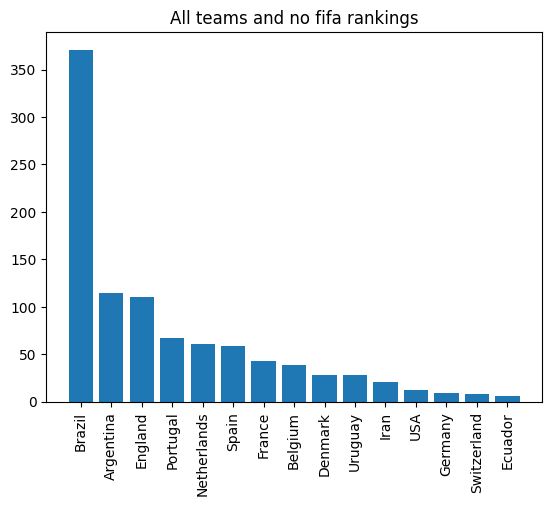

In [96]:
all_teams_no_fifa_rank = pd.read_csv("../all_teams_no_fifa_rank.csv")
plot_winner_bar_plot(all_teams_no_fifa_rank, 15, "All teams and no fifa rankings")

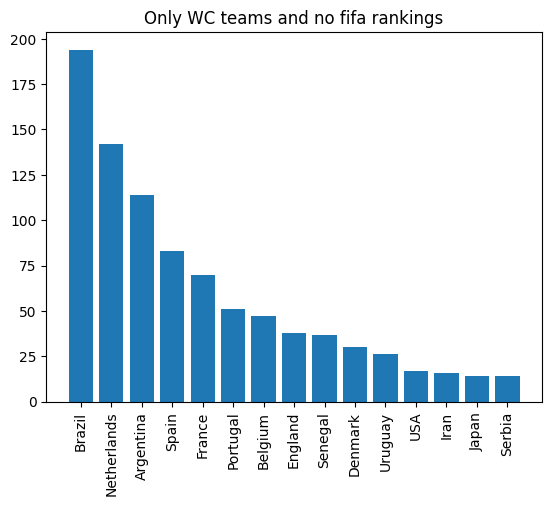

In [97]:
wc_teams_no_fifa_rank = pd.read_csv("../wc_teams_no_fifa_rank.csv")
plot_winner_bar_plot(wc_teams_no_fifa_rank, 15, "Only WC teams and no fifa rankings")

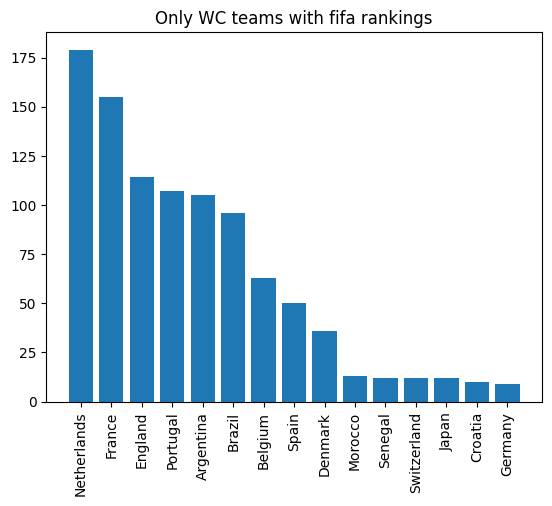

In [98]:
wc_teams_with_fifa_rank = pd.read_csv("../wc_teams_with_fifa_rank.csv")
plot_winner_bar_plot(wc_teams_with_fifa_rank, 15, "Only WC teams with fifa rankings")

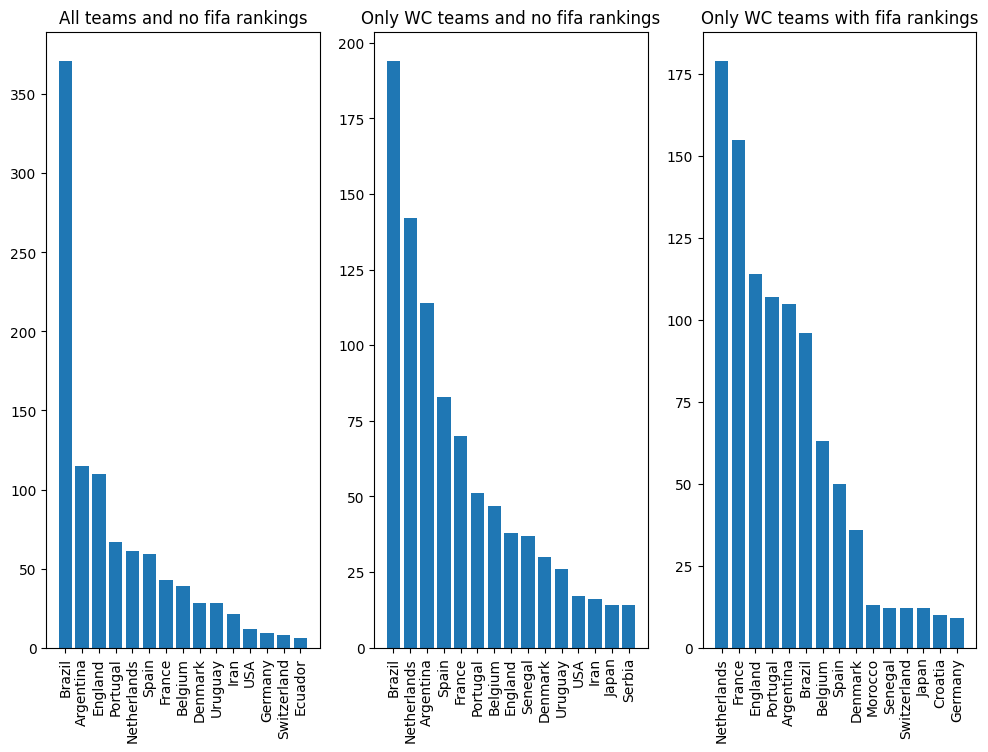

In [104]:
plot_winner_bar_plot_multiple(df_list=[all_teams_no_fifa_rank, wc_teams_no_fifa_rank, wc_teams_with_fifa_rank],
                              plot_dim=(1, 3),
                              top=15,
                              title_list=["All teams and no fifa rankings",
                                          "Only WC teams and no fifa rankings",
                                          "Only WC teams with fifa rankings"])